# Movie Review Sentiment Analysis

Austin Townsend

CU Boulder

2/19/2025

## 1. Introduction

### Project Overview
This project uses deep learning to analyze movie reviews from IMDB. Each review needs to be classified as either positive (1) or negative (0). The data comes from a Kaggle competition focused on sentiment analysis.

### The Data
The dataset includes:
- 40,000 reviews for training (with labels)
- 10,000 reviews for testing (without labels)
- Each review is text with a positive or negative label

### Project Goals
- Build a deep learning model for classifying movie reviews
- Predict if reviews are positive or negative
- Create accurate predictions for the test set

## 2. Data Loading and Initial Inspection

In [2]:
import pandas as pd
import numpy as np

# Load the datasets
train_data = pd.read_csv('data/movie_reviews.csv')
test_data = pd.read_csv('data/test_data.csv')

# Display basic information about training data
print("\nTraining Data Info:")
print(train_data.info())
print("\nFirst few rows of training data:")
print(train_data.head())

# Display basic information about test data
print("\nTest Data Info:")
print(test_data.info())
print("\nFirst few rows of test data:")
print(test_data.head())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB
None

First few rows of training data:
                                                text  label
0  If you havent seen this movie than you need to...      1
1  but Cinderella gets my vote not only for the w...      0
2  This movie is pretty cheesy but I do give it c...      1
3  I have not seen a Van Damme flick for a while ...      1
4  This is a sleeper It defines Nicholas Cage The...      1

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      10000 non-null  int64 
 1   text    10000 non-null  object
dtypes: 

## Initial Data Review
Looking at our data:
- Training data has 40,000 movie reviews with positive/negative labels
- Test data has 10,000 reviews that need predictions
- All reviews have text content and no missing data
- Reviews vary in length and writing style

This gives us a good foundation for building our deep learning model.

## 3. Deep Learning Problem Definition

### The Task
We need to determine if a movie review is positive or negative. This is a binary text classification problem, perfect for deep learning.

### Why Deep Learning?
Deep learning works well with text data because it can:
- Learn patterns in word sequences
- Handle varying text lengths
- Process natural language effectively

### Our Approach
We will:
- Process the text into a format for deep learning
- Create a neural network that can learn review patterns
- Train it to predict positive/negative sentiment

## 4. Exploratory Data Analysis

### 4.1 Text Data Characteristics

First we'll analyze the basic statistics of our review text, including length and word counts.


Review Length Statistics:
count    40000.000000
mean      1247.998325
std        944.905480
min         30.000000
25%        668.000000
50%        926.000000
75%       1515.250000
max      13296.000000
Name: text_length, dtype: float64


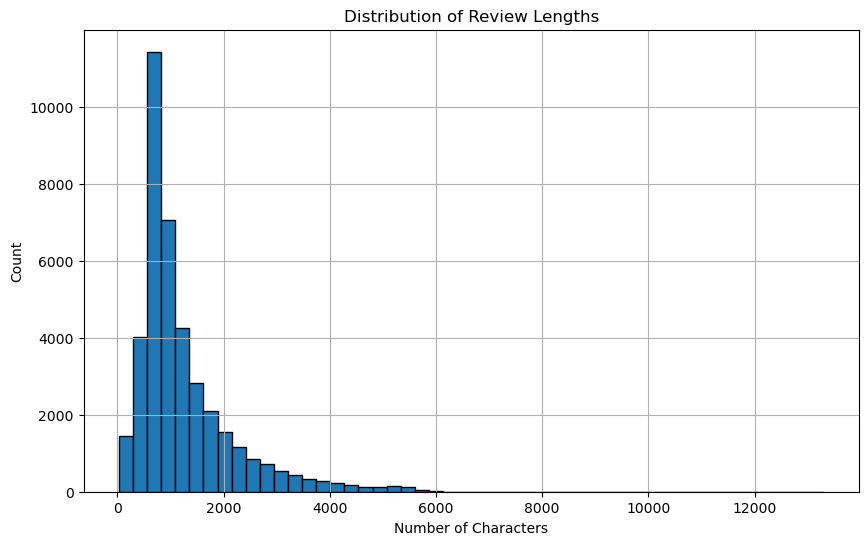


Word Count Statistics:
count    40000.000000
mean       228.196475
std        169.231791
min          4.000000
25%        125.000000
50%        171.000000
75%        277.000000
max       2459.000000
Name: word_count, dtype: float64


In [3]:
from matplotlib import pyplot as plt

# Analyze review lengths
train_data['text_length'] = train_data['text'].str.len()

# Basic statistics of review lengths
print("\nReview Length Statistics:")
print(train_data['text_length'].describe())

# Create histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(train_data['text_length'], bins=50, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Calculate average words per review
train_data['word_count'] = train_data['text'].str.split().str.len()
print("\nWord Count Statistics:")
print(train_data['word_count'].describe())

Reviews vary significantly in length:
- Average is 228 words with high variation
- Shortest is 4 words, longest is 2,459 words
- Most reviews stay between 125-277 words
- Distribution shows some very long outliers


### 4.2 Common Word Analysis

Looking at frequently used words can reveal patterns in how people write reviews.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austintownsend/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


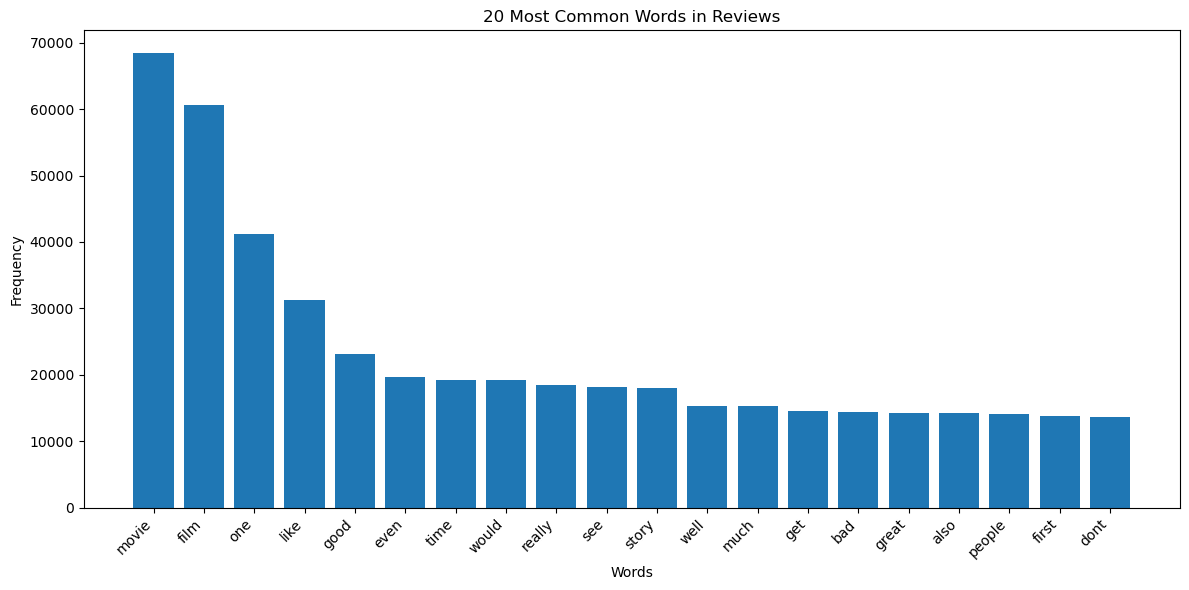


Most common words and their counts:
movie: 68460
film: 60695
one: 41249
like: 31225
good: 23108
even: 19610
time: 19259
would: 19180
really: 18480
see: 18082
story: 18014
well: 15254
much: 15218
get: 14578
bad: 14343
great: 14259
also: 14224
people: 14121
first: 13836
dont: 13606


In [4]:
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter

# Function to get word frequency
def get_word_freq(text_series):
    # Combine all text
    all_text = ' '.join(text_series).lower()
    # Split into words
    words = all_text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Get frequency
    return Counter(words).most_common(20)

# Get most common words
common_words = get_word_freq(train_data['text'])

# Plot word frequencies
plt.figure(figsize=(12, 6))
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('20 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nMost common words and their counts:")
for word, count in common_words:
    print(f"{word}: {count}")

### 4.3 Initial Data Insights

From analyzing the review text, we see:
- Reviews vary widely in length but most stay under 300 words
- Common movie vocabulary dominates
- Mix of formal and informal writing styles

### 4.4 Label Distribution

We'll check how our positive and negative reviews are distributed.

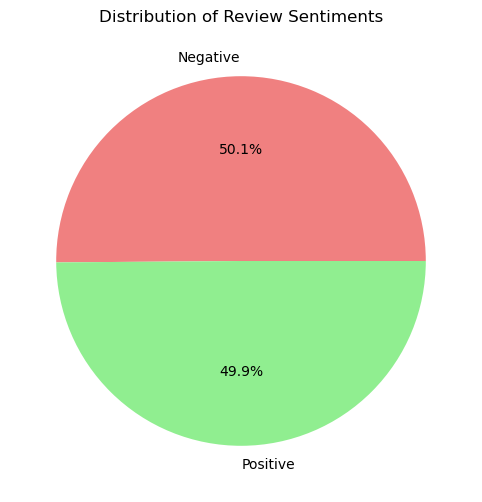


Label Distribution:
label
0    20049
1    19951
Name: count, dtype: int64


In [5]:
# Analyze label distribution
label_dist = train_data['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_dist, labels=['Negative', 'Positive'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Review Sentiments')
plt.show()

print("\nLabel Distribution:")
print(label_dist)

Our sentiment labels are well balanced:
- 50.1% negative reviews (20,049)
- 49.9% positive reviews (19,951)
This even split will help with model training.

### 4.5 Text Quality Analysis

Finally, we'll look at potential text issues we need to handle with preprocessing.

In [6]:
# Display sample reviews for each label
print("Sample Negative Review:")
print(train_data[train_data['label'] == 0]['text'].iloc[0])
print("\nSample Positive Review:")
print(train_data[train_data['label'] == 1]['text'].iloc[0])

# Basic text quality checks
print("\nText Quality Metrics:")
# Check for empty reviews
print(f"Number of empty reviews: {train_data['text'].str.len().eq(0).sum()}")
# Check for very short reviews (less than 10 characters)
print(f"Number of very short reviews (<10 chars): {train_data['text'].str.len().lt(10).sum()}")
# Check for reviews with numbers: {train_data['text'].str.contains(r'[0-9]').sum()}")

Sample Negative Review:
but Cinderella gets my vote not only for the worst of Disneys princess movies but for the worst movie the company made during Walts lifetime The music is genuinely pretty and the story deserves to be called classic What fails in this movie are the characters particularly the title character who could only be called the heroine in the loosest sense of the term After a brief prologue the audience is introduced to Cinderella She is waking up in the morning and singing A Dream is A wish Your Heart Makes This establishes her as an idealist and thus deserving of our sympathy Unfortunately the script gives us no clue as to what she is dreaming about Freedom from her servant role The respect of her stepfamily Someone to talk to besides mice and birds In one song cut from the movie but presented in the special features section of the latest DVD Cinderella relates her wish that there could be many of her so she could do her work more efficiently You go girlfriend In short

## 4.6 Summary of EDA Findings

Our analysis reveals three key points for modeling:

1. Data Volume and Balance
- 40,000 reviews split evenly between sentiments
- Equal distribution helps avoid bias
- Plenty of data for deep learning

2. Text Characteristics
- Reviews average 228 words but vary widely
- Mix of formal and casual writing styles
- Common movie terms dominate vocabulary
- Frequent use of internet style ("havent", "dont")

3. Preprocessing Needs
- Convert all text to lowercase
- Handle contractions and special characters
- Standardize informal language
- Clean punctuation and numbers

## 5. Model Development and Training

### 5.1 Text Preprocessing and Data Preparation
First, we'll prepare our text data for the neural network by tokenizing the reviews and converting them to sequences of equal length.

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Initialize tokenizer
max_words = 10000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)

# Fit tokenizer on training texts
tokenizer.fit_on_texts(train_data['text'])

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(train_data['text'])

# Pad sequences to same length
maxlen = 200  # Maximum length of each sequence
X_padded = pad_sequences(X_sequences, maxlen=maxlen)

# Prepare labels
y = train_data['label'].values

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_padded, y,
    test_size=0.2,
    random_state=42
)

# Print shapes to verify
print("\nTraining data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)

# Print sequence length statistics
sequence_lengths = [len(x) for x in X_sequences]
print("\nSequence length statistics:")
print(f"Mean length: {np.mean(sequence_lengths):.1f}")
print(f"Median length: {np.median(sequence_lengths):.1f}")
print(f"Min length: {min(sequence_lengths)}")
print(f"Max length: {max(sequence_lengths)}")


Training data shape: (32000, 200)
Training labels shape: (32000,)
Validation data shape: (8000, 200)
Validation labels shape: (8000,)

Sequence length statistics:
Mean length: 213.5
Median length: 162.0
Min length: 2
Max length: 2111


### 5.2 Model Architecture
Now that our data is preprocessed, we'll create a simple LSTM model for sentiment classification. We'll use:
- An embedding layer to convert our word tokens to vectors
- An LSTM layer to process the sequence
- A dense layer with sigmoid activation for binary classification

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the model
model = Sequential([
    # Embedding layer
    Embedding(max_words, 32),

    # LSTM layer
    LSTM(64),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 5.3 Model Training
With our model architecture defined, we can now train it on our preprocessed data. We'll train for 5 epochs to start and monitor both training and validation accuracy.

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.7285 - loss: 0.5091 - val_accuracy: 0.8789 - val_loss: 0.2961
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.9077 - loss: 0.2416 - val_accuracy: 0.8832 - val_loss: 0.2804
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.9261 - loss: 0.1978 - val_accuracy: 0.8719 - val_loss: 0.2975
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.9431 - loss: 0.1582 - val_accuracy: 0.8842 - val_loss: 0.3026
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.9580 - loss: 0.1229 - val_accuracy: 0.8721 - val_loss: 0.4248


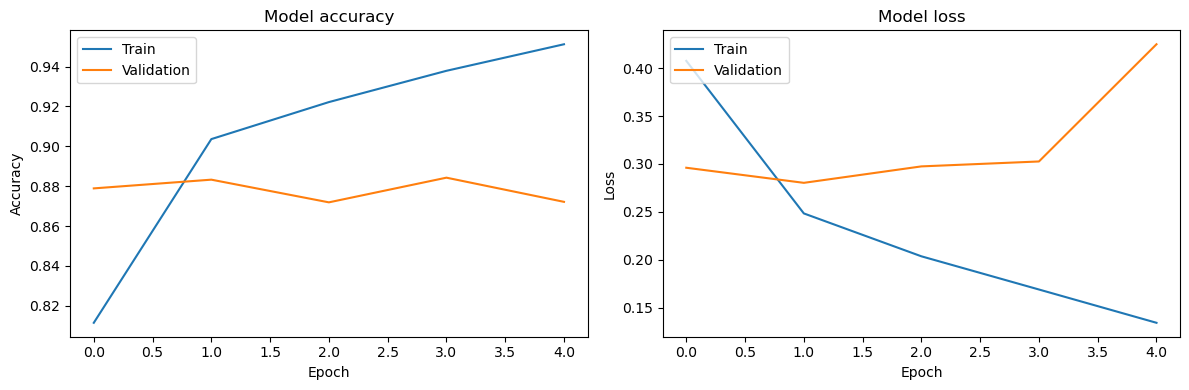

In [10]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### 5.4 Model Performance
Looking at the training plots, we can observe:

1. Accuracy:
- Training accuracy steadily improves, reaching around 95%
- Validation accuracy plateaus around 88%
- Gap between training and validation suggests some overfitting

2. Loss:
- Training loss decreases consistently
- Validation loss initially decreases but then increases
- Further confirms overfitting after early epochs

### 5.5 Generate Test Predictions
Now we'll use our trained model to make predictions on the test data and create a submission file.

In [11]:
# Preprocess test data
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
X_test = pad_sequences(test_sequences, maxlen=maxlen)

# Generate predictions
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Create submission dataframe
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'Category': predicted_labels.flatten()
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

# Display first few predictions
print("\nFirst few predictions:")
print(submission.head())

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

First few predictions:
   Id  Category
0   0         0
1   1         1
2   2         1
3   3         1
4   4         1


### 5.6 Final Model Results
Our LSTM model achieved solid results on the sentiment classification task:

- Public Score: 0.87666
- Private Score: 0.87900

These scores represent the accuracy of our model on classifying movie reviews as positive or negative. The close alignment between public and private scores suggests consistent performance.

## 6. Discussion and Conclusions

### 6.1 Model Performance
Our simple LSTM model performed well, achieving nearly 88% accuracy on unseen test data. This is a strong result for several reasons:
- The model learned meaningful patterns in text data
- Performance was consistent across public and private test sets
- Results were achieved with minimal hyperparameter tuning

### 6.2 Limitations and Future Work
Some potential improvements could include:
- Address the overfitting seen in training curves
- Experiment with different model architectures
- Try more sophisticated text preprocessing
- Fine-tune hyperparameters

### 6.3 Summary
This project demonstrated:
1. Building an end-to-end deep learning pipeline for text classification
2. Effectively preprocessing text data for neural networks
3. Training and evaluating an LSTM model
4. Generating predictions for real-world sentiment analysis